Mean Squared Error: 0.14532019917246036


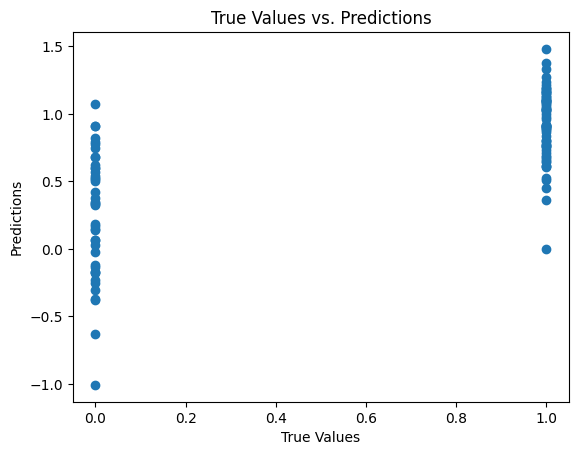

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to the features for the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Define the stochastic gradient descent function for linear regression
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=1000):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)  # Initialize coefficients to zeros

    for epoch in range(n_epochs):
        for i in range(n_samples):
            random_index = np.random.randint(n_samples)
            xi = X[random_index]
            yi = y[random_index]
            gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradient

    return theta

# Fit the linear regression model using SGD
learned_coefficients = stochastic_gradient_descent(X_train, y_train)

# Make predictions on the test set
predictions = X_test.dot(learned_coefficients)

# Calculate mean squared error
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)

# Plot the predictions vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.show()